In [1]:
# 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# 훈련할 악보데이터 만들기
# Bar: 마디

notes1 = ['Note' , 'Rest']  # 음표와 쉼표
notes2 = ['Dur:Whole', 'Dur:Half', 'Dur:4th',  # 음의 길이
          'Dur:8th', 'Dur:16th', 'Dur:32nd']
notes3 = ['Pos:' + str(i) for i in range(-12,9)   # 음의 높이
         ] + ['Pos:b0', 'Pos:#-3', 'Pos:#-2', 'Pos:#-1',
          'Pos:#1', 'Pos:#2', 'Pos:#4', 'Pos:n-1', 'Pos:n-2']
notes4 = ['Stem=Up' , 'Stem=Down']  # 꼬리 방향
notes5 = ['Beam=First' , 'Beam=End']  # 잇단음표
notes6 = ['' , ',Dotted']  # 점 추가
notes7 = ['' , '^']  # 이음줄
notes8 = ['' , 'B']  # 잇단음표 간소화

In [3]:
all_cs = []

#여러 요소들을 조합하여 음표사전 만드는 데에 참조할 단어집합 만들기

# 음표 조합
for s2 in notes2:
    for s3 in notes6:
        for s4 in notes3:
            for s5 in notes7:
                for s6 in notes8:
                    cs = ('|Note|' + s2 + s3 + '|' + s4 + s5 + '|' + s6)
                    all_cs = all_cs + [cs]
                    #print(cs)

# 쉼표 조합
for s1 in notes2:
    for s2 in notes6:
        cs = ('|Rest|' + s1 + s2)
        all_cs = all_cs + [cs]
        #print(cs) 

# 가장 뒤에 막대 삭제
all_cs2 = []
for s in all_cs:
    if s[len(s)-1] == '|':
        s = s[:-1]
    all_cs2.append(s)
all_cs = all_cs2

#음표사전 만들기 
idx = [i for i in range(0, len(all_cs))]
idx2code = dict(zip(idx, all_cs))
code2idx = dict(zip(all_cs, idx))

In [4]:
for i in range(len(idx)):
    print(i, idx2code[i])

0 |Note|Dur:Whole|Pos:-12
1 |Note|Dur:Whole|Pos:-12|B
2 |Note|Dur:Whole|Pos:-12^
3 |Note|Dur:Whole|Pos:-12^|B
4 |Note|Dur:Whole|Pos:-11
5 |Note|Dur:Whole|Pos:-11|B
6 |Note|Dur:Whole|Pos:-11^
7 |Note|Dur:Whole|Pos:-11^|B
8 |Note|Dur:Whole|Pos:-10
9 |Note|Dur:Whole|Pos:-10|B
10 |Note|Dur:Whole|Pos:-10^
11 |Note|Dur:Whole|Pos:-10^|B
12 |Note|Dur:Whole|Pos:-9
13 |Note|Dur:Whole|Pos:-9|B
14 |Note|Dur:Whole|Pos:-9^
15 |Note|Dur:Whole|Pos:-9^|B
16 |Note|Dur:Whole|Pos:-8
17 |Note|Dur:Whole|Pos:-8|B
18 |Note|Dur:Whole|Pos:-8^
19 |Note|Dur:Whole|Pos:-8^|B
20 |Note|Dur:Whole|Pos:-7
21 |Note|Dur:Whole|Pos:-7|B
22 |Note|Dur:Whole|Pos:-7^
23 |Note|Dur:Whole|Pos:-7^|B
24 |Note|Dur:Whole|Pos:-6
25 |Note|Dur:Whole|Pos:-6|B
26 |Note|Dur:Whole|Pos:-6^
27 |Note|Dur:Whole|Pos:-6^|B
28 |Note|Dur:Whole|Pos:-5
29 |Note|Dur:Whole|Pos:-5|B
30 |Note|Dur:Whole|Pos:-5^
31 |Note|Dur:Whole|Pos:-5^|B
32 |Note|Dur:Whole|Pos:-4
33 |Note|Dur:Whole|Pos:-4|B
34 |Note|Dur:Whole|Pos:-4^
35 |Note|Dur:Whole|Pos:-4^|B
36 |Note

673 |Note|Dur:4th,Dotted|Pos:6|B
674 |Note|Dur:4th,Dotted|Pos:6^
675 |Note|Dur:4th,Dotted|Pos:6^|B
676 |Note|Dur:4th,Dotted|Pos:7
677 |Note|Dur:4th,Dotted|Pos:7|B
678 |Note|Dur:4th,Dotted|Pos:7^
679 |Note|Dur:4th,Dotted|Pos:7^|B
680 |Note|Dur:4th,Dotted|Pos:8
681 |Note|Dur:4th,Dotted|Pos:8|B
682 |Note|Dur:4th,Dotted|Pos:8^
683 |Note|Dur:4th,Dotted|Pos:8^|B
684 |Note|Dur:4th,Dotted|Pos:b0
685 |Note|Dur:4th,Dotted|Pos:b0|B
686 |Note|Dur:4th,Dotted|Pos:b0^
687 |Note|Dur:4th,Dotted|Pos:b0^|B
688 |Note|Dur:4th,Dotted|Pos:#-3
689 |Note|Dur:4th,Dotted|Pos:#-3|B
690 |Note|Dur:4th,Dotted|Pos:#-3^
691 |Note|Dur:4th,Dotted|Pos:#-3^|B
692 |Note|Dur:4th,Dotted|Pos:#-2
693 |Note|Dur:4th,Dotted|Pos:#-2|B
694 |Note|Dur:4th,Dotted|Pos:#-2^
695 |Note|Dur:4th,Dotted|Pos:#-2^|B
696 |Note|Dur:4th,Dotted|Pos:#-1
697 |Note|Dur:4th,Dotted|Pos:#-1|B
698 |Note|Dur:4th,Dotted|Pos:#-1^
699 |Note|Dur:4th,Dotted|Pos:#-1^|B
700 |Note|Dur:4th,Dotted|Pos:#1
701 |Note|Dur:4th,Dotted|Pos:#1|B
702 |Note|Dur:4th,Dotted|Po

In [5]:
len(all_cs), len(idx2code), len(code2idx)

(1452, 1452, 1452)

In [6]:
import codecs
from bs4 import BeautifulSoup

#트레이닝할 악보 읽어오기(가요 '목로주점'외 10곡)
fp = codecs.open("NOTES.txt", "r")
lines = fp.readlines()
fp.close()

In [7]:
# 전처리하기 
all_lines = [] 

# 줄바꿈, 꼬리 방향 제거 / 잇단음표 수정
for str1 in lines:
    if not bool(str1.find('Bar')+1) and not bool(str1.find('Chord')+1):
        str1 = str1.replace("\n","")
        str1 = str1.replace("Stem=Up,","")
        str1 = str1.replace("Stem=Down,","")
        str1 = str1.replace("Opts:Beam=First","B")
        str1 = str1.replace("|Opts:Beam=End","")        
        str1 = str1.replace("Opts:Beam","B")    
        str1 = str1.replace(",Slur","")                
        str1 = str1.replace("|Opts:Stem=Up","")  
        str1 = str1.replace("|Opts:Stem=Down","")  
        str1 = str1.replace(",Triplet=First","")     
        str1 = str1.replace(",Triplet=End","")
        str1 = str1.replace(",Triplet","") 
        all_lines.append(str1)

In [8]:
# training data set만들기
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]  # x: window_size개, y: 1개
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# LSTM에 넣을 재료 만들기
win_size = 5
dataset = seq2dataset(seq = all_lines, window_size = win_size)
print(dataset.shape)

(3062, 6)


In [9]:
# input / target 설정하기
max_idx_value = len(idx2code)-1
x_train = dataset[:, 0:win_size]
y_train = dataset[:, win_size]  # 1452개 중 하나

# 입력값 정규화 (0~1)
x_train = x_train / float(max_idx_value)

# 데이터건수*time step*1 (x_train 차원 하나 추가)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# one-hot encoding
y_train = np_utils.to_categorical(y_train) # 차원하나 늘려서 1452-1가 들어감
one_hot_vec_size = y_train.shape[1]

In [10]:
x_train.shape, y_train.shape, one_hot_vec_size

((3062, 5, 1), (3062, 1451), 1451)

In [11]:
# loss 함수 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [12]:
#모델 설계
model = Sequential()
model.add(LSTM(128, input_shape = (win_size, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', metrics=['accuracy'])

#loss function
history = LossHistory()
history.init()

#모델 학습시작
model.fit(x_train, y_train, epochs=1000, batch_size=14, verbose=2, callbacks=[history])
# verbose=2는 epoch당 한줄 출력

Epoch 1/1000
 - 1s - loss: 5.7382 - accuracy: 0.0232
Epoch 2/1000
 - 1s - loss: 5.1806 - accuracy: 0.0297
Epoch 3/1000
 - 1s - loss: 5.1539 - accuracy: 0.0281
Epoch 4/1000
 - 1s - loss: 5.1422 - accuracy: 0.0287
Epoch 5/1000
 - 1s - loss: 5.1363 - accuracy: 0.0297
Epoch 6/1000
 - 1s - loss: 5.1267 - accuracy: 0.0297
Epoch 7/1000
 - 1s - loss: 5.0738 - accuracy: 0.0418
Epoch 8/1000
 - 1s - loss: 4.9557 - accuracy: 0.0392
Epoch 9/1000
 - 1s - loss: 4.8790 - accuracy: 0.0405
Epoch 10/1000
 - 1s - loss: 4.8358 - accuracy: 0.0398
Epoch 11/1000
 - 1s - loss: 4.7948 - accuracy: 0.0441
Epoch 12/1000
 - 1s - loss: 4.7670 - accuracy: 0.0431
Epoch 13/1000
 - 1s - loss: 4.7271 - accuracy: 0.0477
Epoch 14/1000
 - 1s - loss: 4.6943 - accuracy: 0.0509
Epoch 15/1000
 - 1s - loss: 4.6542 - accuracy: 0.0552
Epoch 16/1000
 - 1s - loss: 4.6221 - accuracy: 0.0601
Epoch 17/1000
 - 1s - loss: 4.5797 - accuracy: 0.0607
Epoch 18/1000
 - 1s - loss: 4.5424 - accuracy: 0.0621
Epoch 19/1000
 - 1s - loss: 4.5037 - 

Epoch 152/1000
 - 1s - loss: 1.5777 - accuracy: 0.5434
Epoch 153/1000
 - 1s - loss: 1.5784 - accuracy: 0.5405
Epoch 154/1000
 - 1s - loss: 1.5542 - accuracy: 0.5398
Epoch 155/1000
 - 1s - loss: 1.5640 - accuracy: 0.5307
Epoch 156/1000
 - 1s - loss: 1.5675 - accuracy: 0.5336
Epoch 157/1000
 - 1s - loss: 1.5446 - accuracy: 0.5438
Epoch 158/1000
 - 1s - loss: 1.5246 - accuracy: 0.5555
Epoch 159/1000
 - 1s - loss: 1.5446 - accuracy: 0.5411
Epoch 160/1000
 - 1s - loss: 1.5055 - accuracy: 0.5506
Epoch 161/1000
 - 1s - loss: 1.5181 - accuracy: 0.5474
Epoch 162/1000
 - 1s - loss: 1.4988 - accuracy: 0.5539
Epoch 163/1000
 - 1s - loss: 1.4927 - accuracy: 0.5594
Epoch 164/1000
 - 1s - loss: 1.4892 - accuracy: 0.5637
Epoch 165/1000
 - 1s - loss: 1.4815 - accuracy: 0.5568
Epoch 166/1000
 - 1s - loss: 1.4543 - accuracy: 0.5660
Epoch 167/1000
 - 1s - loss: 1.4640 - accuracy: 0.5702
Epoch 168/1000
 - 1s - loss: 1.4474 - accuracy: 0.5735
Epoch 169/1000
 - 1s - loss: 1.4562 - accuracy: 0.5627
Epoch 170/

Epoch 301/1000
 - 1s - loss: 0.8925 - accuracy: 0.6937
Epoch 302/1000
 - 1s - loss: 0.9036 - accuracy: 0.6966
Epoch 303/1000
 - 1s - loss: 0.9155 - accuracy: 0.6878
Epoch 304/1000
 - 1s - loss: 0.8950 - accuracy: 0.6953
Epoch 305/1000
 - 1s - loss: 0.8911 - accuracy: 0.6960
Epoch 306/1000
 - 1s - loss: 0.8886 - accuracy: 0.6950
Epoch 307/1000
 - 1s - loss: 0.9019 - accuracy: 0.6907
Epoch 308/1000
 - 1s - loss: 0.9106 - accuracy: 0.6858
Epoch 309/1000
 - 1s - loss: 0.8703 - accuracy: 0.7022
Epoch 310/1000
 - 1s - loss: 0.8914 - accuracy: 0.6992
Epoch 311/1000
 - 1s - loss: 0.9075 - accuracy: 0.6790
Epoch 312/1000
 - 1s - loss: 0.8992 - accuracy: 0.6881
Epoch 313/1000
 - 1s - loss: 0.8735 - accuracy: 0.6953
Epoch 314/1000
 - 1s - loss: 0.8695 - accuracy: 0.6963
Epoch 315/1000
 - 1s - loss: 0.8633 - accuracy: 0.7097
Epoch 316/1000
 - 1s - loss: 0.9268 - accuracy: 0.6754
Epoch 317/1000
 - 1s - loss: 0.8671 - accuracy: 0.6924
Epoch 318/1000
 - 1s - loss: 0.8626 - accuracy: 0.6976
Epoch 319/

Epoch 450/1000
 - 1s - loss: 0.6531 - accuracy: 0.7521
Epoch 451/1000
 - 1s - loss: 0.6802 - accuracy: 0.7430
Epoch 452/1000
 - 1s - loss: 0.6568 - accuracy: 0.7567
Epoch 453/1000
 - 1s - loss: 0.6892 - accuracy: 0.7436
Epoch 454/1000
 - 1s - loss: 0.6790 - accuracy: 0.7534
Epoch 455/1000
 - 1s - loss: 0.7383 - accuracy: 0.7240
Epoch 456/1000
 - 1s - loss: 0.6762 - accuracy: 0.7466
Epoch 457/1000
 - 1s - loss: 0.6581 - accuracy: 0.7492
Epoch 458/1000
 - 1s - loss: 0.6548 - accuracy: 0.7544
Epoch 459/1000
 - 1s - loss: 0.6721 - accuracy: 0.7407
Epoch 460/1000
 - 1s - loss: 0.7080 - accuracy: 0.7335
Epoch 461/1000
 - 1s - loss: 0.6521 - accuracy: 0.7440
Epoch 462/1000
 - 1s - loss: 0.6478 - accuracy: 0.7583
Epoch 463/1000
 - 1s - loss: 0.6629 - accuracy: 0.7515
Epoch 464/1000
 - 1s - loss: 0.6392 - accuracy: 0.7613
Epoch 465/1000
 - 1s - loss: 0.6826 - accuracy: 0.7479
Epoch 466/1000
 - 1s - loss: 0.6532 - accuracy: 0.7528
Epoch 467/1000
 - 1s - loss: 0.7038 - accuracy: 0.7364
Epoch 468/

Epoch 599/1000
 - 1s - loss: 0.5520 - accuracy: 0.7838
Epoch 600/1000
 - 1s - loss: 0.5440 - accuracy: 0.7799
Epoch 601/1000
 - 1s - loss: 0.6513 - accuracy: 0.7508
Epoch 602/1000
 - 1s - loss: 0.5647 - accuracy: 0.7734
Epoch 603/1000
 - 1s - loss: 0.5460 - accuracy: 0.7828
Epoch 604/1000
 - 1s - loss: 0.6232 - accuracy: 0.7564
Epoch 605/1000
 - 1s - loss: 0.5672 - accuracy: 0.7789
Epoch 606/1000
 - 1s - loss: 0.5570 - accuracy: 0.7782
Epoch 607/1000
 - 1s - loss: 0.5650 - accuracy: 0.7822
Epoch 608/1000
 - 1s - loss: 0.5593 - accuracy: 0.7782
Epoch 609/1000
 - 1s - loss: 0.5562 - accuracy: 0.7887
Epoch 610/1000
 - 1s - loss: 0.5836 - accuracy: 0.7645
Epoch 611/1000
 - 1s - loss: 0.5448 - accuracy: 0.7880
Epoch 612/1000
 - 1s - loss: 0.5327 - accuracy: 0.7835
Epoch 613/1000
 - 1s - loss: 0.5518 - accuracy: 0.7828
Epoch 614/1000
 - 1s - loss: 0.5948 - accuracy: 0.7691
Epoch 615/1000
 - 1s - loss: 0.5875 - accuracy: 0.7782
Epoch 616/1000
 - 1s - loss: 0.5726 - accuracy: 0.7694
Epoch 617/

Epoch 748/1000
 - 1s - loss: 0.5101 - accuracy: 0.7995
Epoch 749/1000
 - 1s - loss: 0.4880 - accuracy: 0.7936
Epoch 750/1000
 - 1s - loss: 0.5578 - accuracy: 0.7854
Epoch 751/1000
 - 1s - loss: 0.5816 - accuracy: 0.7714
Epoch 752/1000
 - 1s - loss: 0.5108 - accuracy: 0.7897
Epoch 753/1000
 - 1s - loss: 0.5578 - accuracy: 0.7809
Epoch 754/1000
 - 1s - loss: 0.4707 - accuracy: 0.8119
Epoch 755/1000
 - 1s - loss: 0.4791 - accuracy: 0.8073
Epoch 756/1000
 - 1s - loss: 0.5025 - accuracy: 0.7943
Epoch 757/1000
 - 1s - loss: 0.5156 - accuracy: 0.7959
Epoch 758/1000
 - 1s - loss: 0.4810 - accuracy: 0.8021
Epoch 759/1000
 - 1s - loss: 0.4887 - accuracy: 0.8067
Epoch 760/1000
 - 1s - loss: 0.4713 - accuracy: 0.8040
Epoch 761/1000
 - 1s - loss: 0.5172 - accuracy: 0.7913
Epoch 762/1000
 - 1s - loss: 0.4761 - accuracy: 0.8050
Epoch 763/1000
 - 1s - loss: 0.4906 - accuracy: 0.8044
Epoch 764/1000
 - 1s - loss: 0.4867 - accuracy: 0.7992
Epoch 765/1000
 - 1s - loss: 0.5224 - accuracy: 0.7802
Epoch 766/

Epoch 897/1000
 - 1s - loss: 0.4647 - accuracy: 0.8132
Epoch 898/1000
 - 1s - loss: 0.5366 - accuracy: 0.7773
Epoch 899/1000
 - 1s - loss: 0.4485 - accuracy: 0.8207
Epoch 900/1000
 - 1s - loss: 0.4345 - accuracy: 0.8132
Epoch 901/1000
 - 1s - loss: 0.4407 - accuracy: 0.8145
Epoch 902/1000
 - 1s - loss: 0.4696 - accuracy: 0.8021
Epoch 903/1000
 - 1s - loss: 0.4591 - accuracy: 0.8109
Epoch 904/1000
 - 1s - loss: 0.4475 - accuracy: 0.8116
Epoch 905/1000
 - 1s - loss: 0.4739 - accuracy: 0.8073
Epoch 906/1000
 - 1s - loss: 0.4261 - accuracy: 0.8236
Epoch 907/1000
 - 1s - loss: 0.4490 - accuracy: 0.8067
Epoch 908/1000
 - 1s - loss: 0.4317 - accuracy: 0.8204
Epoch 909/1000
 - 1s - loss: 0.4465 - accuracy: 0.8161
Epoch 910/1000
 - 1s - loss: 0.5941 - accuracy: 0.7773
Epoch 911/1000
 - 1s - loss: 0.4427 - accuracy: 0.8125
Epoch 912/1000
 - 1s - loss: 0.4304 - accuracy: 0.8145
Epoch 913/1000
 - 1s - loss: 0.4249 - accuracy: 0.8184
Epoch 914/1000
 - 1s - loss: 0.4898 - accuracy: 0.7975
Epoch 915/

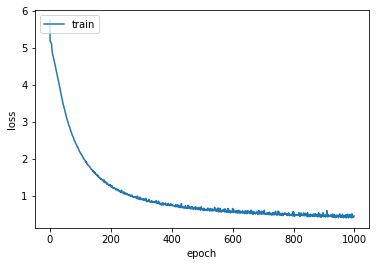

3062/3062 [==============================] - 0s 81us/step
accuracy: 84.00%


In [13]:
# 트레이닝 과정
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 모델평가
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 작곡을 위한 모델이기 때문에 정확도가 높을 필요는 없음
# 정확도가 높다면 입력으로 준 노래와 거의 유사한 노래가 나올 확률이 큼

In [21]:
#작곡시작
pred_count = 200 #생성할 note(또는 rest)의 수
    
seq_in = ['|Note|Dur:4th|Pos:-4',
          '|Note|Dur:4th|Pos:-2',
          '|Note|Dur:Half,Dotted|Pos:-2',
          '|Note|Dur:4th|Pos:-2',
          '|Note|Dur:8th|Pos:-8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, win_size, 1))
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)  # 최댓값 인덱스 반환
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)  # 맨 앞을 빼내어 길이 3을 유지

print("full song prediction : ", seq_out)

full song prediction :  ['|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-2', '|Note|Dur:Half,Dotted|Pos:-2', '|Note|Dur:4th|Pos:-2', '|Note|Dur:8th|Pos:-8', '|Note|Dur:Half,Dotted|Pos:-5', '|Note|Dur:4th|Pos:2', '|Note|Dur:4th|Pos:-3', '|Note|Dur:4th|Pos:-4', '|Note|Dur:8th|Pos:-1|B', '|Note|Dur:Half,Dotted|Pos:-6', '|Note|Dur:Half|Pos:-1', '|Note|Dur:4th|Pos:-6', '|Rest|Dur:Whole', '|Note|Dur:8th|Pos:-9', '|Note|Dur:8th|Pos:-5|B', '|Note|Dur:4th|Pos:-5', '|Note|Dur:4th|Pos:-5', '|Note|Dur:4th|Pos:-4', '|Note|Dur:Whole|Pos:-6', '|Note|Dur:4th|Pos:-9', '|Rest|Dur:8th', '|Note|Dur:8th|Pos:-9', '|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-4', '|Rest|Dur:16th', '|Note|Dur:8th,Dotted|Pos:-3^', '|Note|Dur:8th|Pos:-3|B', '|Note|Dur:8th|Pos:-4', '|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-5', '|Note|Dur:4th|Pos:-6', '|Rest|Dur:8th', '|Note|Dur:8th|Pos:-6', '|Note|Dur:4th|Pos:-5', '|Note|Dur:8th|Pos:-9|B', '|Note|Dur:8th|Pos:-9', '|Note|Dur:Whole|Pos:-9', '|Note|Dur:Half|Pos:-2^', '|Note|Dur:8th,Dot

In [22]:
nwc = open('mysong.txt', 'w')

for item in seq_out:
  nwc.write("%s\n" % item)

nwc.close()

In [23]:
# NWC format으로 다시 만들기 
import re
fp = codecs.open("mysong.txt", "r")
lines = fp.readlines()
len_sum = 0 
length = 0 

#4분의 4박자
N = 4 

bar = 0.25 * N   # 마디 1개의 길이
update_lines = []  # 여기에 다시 만듬
over_length = 0 
cnt = 0 
fp.close()

In [24]:
for note in lines:
    
    cnt += 1
    need_special = False
    resid_special = False
    note = note.replace('\n' , '')
    note_comp = note.split('|')
    
    # 음 길이 추출
    matching = [s for s in note_comp if "Dur" in s][0].split(":")[1]
    
    # 마디 구분을 위해 음 길이 계산
    if matching.find('Half')+1:
        length = 0.5
    elif matching.find('Whole')+1:
        length = 1
    else:        
        length = 1/int(re.findall('\d+', matching)[0])
        
    if matching.find('Dotted')+1:
        length = length + length/2
        
    len_sum += length
    
    # 1이하인 경우는 정상이므로 추가한다. 
    if len_sum <= 1:
        update_lines.append(note)
        print(note , length , len_sum)
        
        if len_sum == 1:
            len_sum = 0 
            update_lines.append('|Bar')
            print('|Bar')
        
        #마지막 마디에서 완전하게 음표를 채운다. 
        if len(lines) == cnt:
            print('**********마지막 마디입니다.' , note , len_sum)
            need_len = 1 - len_sum
            
            if need_len > 0:
                
                #마지막 음표를 채운다. 
                if need_len == 0.75:
                    Dur_str = "Half,Dotted"
                elif need_len == 0.5:
                    Dur_str = "Half"
                elif need_len == 0.375:
                    Dur_str = "4th,Dotted"
                elif need_len == 0.25:
                    Dur_str = "4th"
                elif need_len == 0.1875:
                    Dur_str = "8th,Dotted"
                elif need_len == 0.125:
                    Dur_str = "8th"
                elif need_len == 0.09375:
                    Dur_str = "16th,Dotted"
                elif need_len == 0.0625:
                    Dur_str = "16th"
                elif need_len == 0.046875:
                    Dur_str = "32th,Dotted"
                elif need_len == 0.03125:
                    Dur_str = "32th"
                
                Dur_str = "Dur:" + Dur_str
                
                # 음 길이 추출
                note_comp = note.split('|')
                index = [i for i, string in enumerate(note_comp) if "Dur" in string][0]
                
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                
                # 마지막 마디의 마지막 음표를 추가한다.(쉼표가 될 수도 있음)
                if Dur_str != "Dur:":
                    update_lines.append(need_str)
                    print("*" , need_str , need_len , 1.0)

            
    else:
        # 길이가 over가 된 경우에는 음표를 2개로 쪼개고 가운데에 bar을 찍는다. 
        # Dur이 속한 위치와 길이를 알아낸다.(Dur를 수정해야 하기 때문에)
        note_comp = note.split('|')
        index = [i for i, string in enumerate(note_comp) if "Dur" in string][0]
        matching = [s for s in note_comp if "Dur" in s][0].split(":")[1]
        
        if "Whole" in matching:
            over_length = 1
        elif "Half" in matching:
            over_length = 0.5
        elif "4th" in matching:
            over_length = 1/4
        elif "8th" in matching:
            over_length = 1/8
        elif "16th" in matching:
            over_length = 1/16
        elif "32nd" in matching:
            over_length = 1/32
        else:
            over_length = 0
            
        if "Dotted" in matching:
            over_length = over_length + over_length/2
        
        #마디의 모자란 길이와 남는 길이를 알아내고 bar(마디)를 찍을 준비를 한다. 
        resid_len = len_sum - 1                 #다음 마디로 넘어갈 길이
        need_len = over_length - resid_len      #현재 마디에서 필요한 길이
        
        #마디의 남은 부분 채우기(현재마디의 여분) 
        if need_len == 0.75:
            Dur_str = "Half,Dotted"
        elif need_len == 0.5:
            Dur_str = "Half"
        elif need_len == 0.375:
            Dur_str = "4th,Dotted"
        elif need_len == 0.25:
            Dur_str = "4th"
        elif need_len == 0.1875:
            Dur_str = "8th,Dotted"
        elif need_len == 0.125:
            Dur_str = "8th"
        elif need_len == 0.09375:
            Dur_str = "16th,Dotted"
        elif need_len == 0.0625:
            Dur_str = "16th"
        elif need_len == 0.046875:
            Dur_str = "32th,Dotted"
        elif need_len == 0.03125:
            Dur_str = "32th"
        elif need_len == 0:
            Dur_str = ""
        else:
            #해당사항이 없으면 가장 가까운 음표를 찾아서 넣어준다.(이런 경우는 2개이상의 음표가 필요하다.)
            if need_len == 0.15625 or need_len == 0.625:
                need_special = True

            
        #마디의 over된 부분 채우기(다음 마디로 넘어감)
        if resid_len == 0.75:
            Dur_str2 = "Half,Dotted"
        elif resid_len == 0.5:
            Dur_str2 = "Half"
        elif resid_len == 0.375:
            Dur_str2 = "4th,Dotted"
        elif resid_len == 0.25:
            Dur_str2 = "4th"
        elif resid_len == 0.1875:
            Dur_str2 = "8th,Dotted"
        elif resid_len == 0.125:
            Dur_str2 = "8th"
        elif resid_len == 0.09375:
            Dur_str2 = "16th,Dotted"
        elif resid_len == 0.0625:
            Dur_str2 = "16th"
        elif resid_len == 0.046875:
            Dur_str2 = "32th,Dotted"
        elif resid_len == 0.03125:
            Dur_str2 = "32th"
        elif resid_len == 0:
            Dur_str2 = ""
        else:
            #해당사항이 없으면 가장 가까운 음표를 찾아서 넣어준다.
            resid_special = True
        
        #마디의 여분을 채우는 작업 ########################################1
        len_sum = len_sum - resid_len
        
        Dur_str = "Dur:" + Dur_str
        Dur_str2 = "Dur:" + Dur_str2 
        
        note_comp[index] = Dur_str
        need_str = '|'.join(note_comp)

        note_comp[index] = Dur_str2
        resid_str = '|'.join(note_comp)
        
        if Dur_str != "Dur:":
            update_lines.append(need_str)
            print("*" , need_str , need_len , len_sum)
            
        #마디가 맞지 않는 특별한 상황    
        if need_special == True:
            if need_len == 0.15625:    #8분음표와 32분음표를 추가 
                Dur_str = "Dur:8th"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/8 , len_sum)
                
                Dur_str = "Dur:32nd"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/32 , len_sum)
                
            if need_len == 0.625:      #이분음표와 8분음표를 추가
                Dur_str = "Dur:Half"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/2 , len_sum)
                
                Dur_str = "Dur:8th"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/8 , len_sum)
                
            # ....계속 추가하여 완벽하게 만든다. 

        #마디의 경계를 그려준다.(칸막이) ###############################################2
        update_lines.append('|Bar')
        print('|Bar') 

        #다음 마디로 넘어가는 부분을 그려준다. ##########################################3 
        len_sum = resid_len
        
        if Dur_str2 != "Dur:":
            update_lines.append(resid_str)
            print("*" , resid_str , resid_len , len_sum)

        #음표길이 문자열을 초기화한다. ####################################
        Dur_str = ""
        Dur_str2 = ""     

|Note|Dur:4th|Pos:-4 0.25 0.25
|Note|Dur:4th|Pos:-2 0.25 0.5
* |Note|Dur:Half|Pos:-2 0.5 1.0
|Bar
* |Note|Dur:4th|Pos:-2 0.25 0.25
|Note|Dur:4th|Pos:-2 0.25 0.5
|Note|Dur:8th|Pos:-8 0.125 0.625
* |Note|Dur:4th,Dotted|Pos:-5 0.375 1.0
|Bar
* |Note|Dur:4th,Dotted|Pos:-5 0.375 0.375
|Note|Dur:4th|Pos:2 0.25 0.625
|Note|Dur:4th|Pos:-3 0.25 0.875
* |Note|Dur:8th|Pos:-4 0.125 1.0
|Bar
* |Note|Dur:8th|Pos:-4 0.125 0.125
|Note|Dur:8th|Pos:-1|B 0.125 0.25
|Note|Dur:Half,Dotted|Pos:-6 0.75 1.0
|Bar
|Note|Dur:Half|Pos:-1 0.5 0.5
|Note|Dur:4th|Pos:-6 0.25 0.75
* |Rest|Dur:4th 0.25 1.0
|Bar
* |Rest|Dur:Half,Dotted 0.75 0.75
|Note|Dur:8th|Pos:-9 0.125 0.875
|Note|Dur:8th|Pos:-5|B 0.125 1.0
|Bar
|Note|Dur:4th|Pos:-5 0.25 0.25
|Note|Dur:4th|Pos:-5 0.25 0.5
|Note|Dur:4th|Pos:-4 0.25 0.75
* |Note|Dur:4th|Pos:-6 0.25 1.0
|Bar
* |Note|Dur:Half,Dotted|Pos:-6 0.75 0.75
|Note|Dur:4th|Pos:-9 0.25 1.0
|Bar
|Rest|Dur:8th 0.125 0.125
|Note|Dur:8th|Pos:-9 0.125 0.25
|Note|Dur:4th|Pos:-4 0.25 0.5
|Note|Dur:4th|Pos

In [25]:
#Beam(잇단음표)에 해당하는 문자열을 넣어준다. #########################################
start = False
end = False
cnt = 0 

for uline in update_lines:
    cnt += 1
    
    if 'Bar' in uline:
        start = False
        before_line = update_lines[cnt-2] # 2칸 앞 음표를 데려오기
        
        if 'BF' in before_line:  # 시작이면 없애기
            before_line = before_line.replace('|BF' , '')
            update_lines[cnt-2] = before_line
        elif 'BM' in before_line: # 중간이면 끝내기
            before_line = before_line.replace('BM' , 'BE')
            update_lines[cnt-2] = before_line
    
    if uline[-1] == "B" and start == False:  # 시작
        start = True
        uline = uline.replace('B' , 'BF')
        update_lines[cnt-1] = uline
    elif start == True and uline[-1] == "B":  # 중간
        uline = uline.replace('B' , 'BM')
        update_lines[cnt-1] = uline
    elif start == True and uline[-1] != "B":  # 끝
        uline = uline + '|BE'
        end = True
        start = False
        update_lines[cnt-1] = uline

In [26]:
#마지막 라인도 같은 방법으로 수정함.
last_line = update_lines[len(update_lines)-1]
last_line

if 'BF' in last_line:
    last_line = last_line.replace('|BF' , '')
    update_lines[len(update_lines)-1] = last_line
elif 'BM' in last_line:
    last_line = last_line.replace('BM' , 'BE')
    update_lines[len(update_lines)-1] = last_line
    
# print(update_lines)

In [29]:
cnt = 0 

#특정 작곡프로그램의 format에 맞게 수정함. 
for uline in update_lines:
    cnt += 1
    
    if 'Pos' in uline:
        #음의 높이를 구하기(음의 높이에 따라 stem의 방향이 바뀐다.)
        uline_comp = uline.split('|')
        index = [i for i, string in enumerate(uline_comp) if "Pos" in string][0]
        matching = [s for s in uline_comp if "Pos" in s][0].split(":")[1]
        pos = int(re.findall('[+-]*\d+', matching)[0])
        
        if pos < 0:
            direct = "Opts:Stem=Up,"
        else:
            direct = "Opts:Stem=Down,"
            
    else:
        direct = ""

    uline = uline.replace('BE',direct + 'Beam=End')
    uline = uline.replace('BF',direct + 'Beam=First')
    uline = uline.replace('BM','Beam')

    update_lines[cnt-1] = uline 
    
    print(uline) 

!NoteWorthyComposer(2.75)
|Clef|Type:Treble
|TimeSig|Signature:4/4
|Tempo|Tempo:128|Pos:6
|Bar
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-2
|Note|Dur:Half|Pos:-2
|Bar
|Note|Dur:4th|Pos:-2
|Note|Dur:4th|Pos:-2
|Note|Dur:8th|Pos:-8
|Note|Dur:4th,Dotted|Pos:-5
|Bar
|Note|Dur:4th,Dotted|Pos:-5
|Note|Dur:4th|Pos:2
|Note|Dur:4th|Pos:-3
|Note|Dur:8th|Pos:-4
|Bar
|Note|Dur:8th|Pos:-4
|Note|Dur:8th|Pos:-1|Opts:Stem=Up,Beam=First
|Note|Dur:Half,Dotted|Pos:-6|Opts:Stem=Up,Beam=End
|Bar
|Note|Dur:Half|Pos:-1
|Note|Dur:4th|Pos:-6
|Rest|Dur:4th
|Bar
|Rest|Dur:Half,Dotted
|Note|Dur:8th|Pos:-9
|Note|Dur:8th|Pos:-5
|Bar
|Note|Dur:4th|Pos:-5
|Note|Dur:4th|Pos:-5
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-6
|Bar
|Note|Dur:Half,Dotted|Pos:-6
|Note|Dur:4th|Pos:-9
|Bar
|Rest|Dur:8th
|Note|Dur:8th|Pos:-9
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-4
|Rest|Dur:16th
|Note|Dur:8th,Dotted|Pos:-3^
|Bar
|Note|Dur:8th|Pos:-3|Opts:Stem=Up,Beam=First
|Note|Dur:8th|Pos:-4|Opts:Stem=Up,Beam=End
|Note|Dur:4th|Pos:-4
|Note|Dur:4th

In [28]:
#최종 악보만들기 

preface = ['!NoteWorthyComposer(2.75)' , '|Clef|Type:Treble' , '|TimeSig|Signature:4/4' , '|Tempo|Tempo:128|Pos:6','|Bar']
postface = ['!NoteWorthyComposer-End']        
update_lines = preface + update_lines + postface

nwc = open('mysong.nwctxt', 'w')

for uline in update_lines:
  nwc.write("%s\n" % uline)

nwc.close()